【問題1】各種手法の実行

手法を実行するために、仮のサンプルデータを生成しておく  
（生成はネット上にあったとあるサイトのコードを参考にした）

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
import keras

from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential

from keras.layers import Dense, Activation

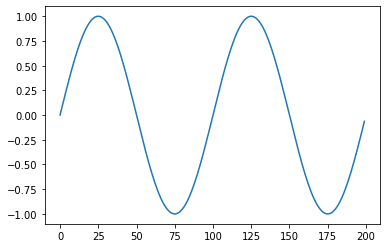

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def sin2p(x, t=100):
    return np.sin(2.0 * np.pi * x / t) # sin(2πx/t) t = 周期
 
def sindata(t=100, cycle=2):
    x = np.arange(0, cycle*t) # 0 から cycle * t 未満の数
    return sin2p(x)
 
plt.plot(sindata(100, 2)) # 1周期100個データ、2周期分
plt.show()

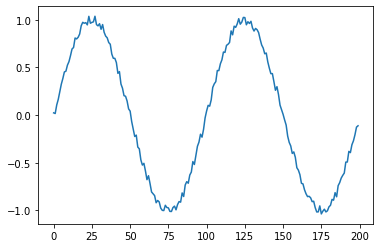

In [3]:
def noisy(Y, noise_range=(-0.05, 0.05)):
    noise = np.random.uniform(noise_range[0], noise_range[1], size=Y.shape)
    return Y + noise
 
plt.plot(noisy(sindata(100, 2), (-0.05, 0.05) ))
plt.show()

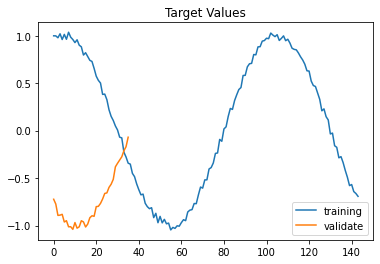

In [4]:
from sklearn.model_selection import train_test_split
 
np.random.seed(0)
 
rawdata = noisy(sindata(100,2), (-0.05, 0.05)) # 2周期分のノイズあり sin 波データを生成
inputlen = 20 # 1入力データはデータ 20 個としました
 
input=[]
target=[]
for i in range(0, len(rawdata) - inputlen):  # range(0, 180)   0 .. 179 の 180回実行
    input.append( rawdata[i:i+inputlen] )  # [i:i+20] のスライスで i から i+19 の20個を入力データに追加
    target.append( rawdata[i+inputlen] )  # [i+20] がその直前までのデータ群 [i:i+20] の正解値となるのでターゲットに追加
 
# numpy の3次元配列に変換
X = np.array(input).reshape(len(input), inputlen, 1) # 入力データ (180, 20, 1)
Y = np.array(target).reshape(len(input), 1) # ターゲット (180, 1)
 
# トレーニングと評価用にデータを 8:2 に分割します。デフォルトがシャッフルなのでしないように
x, val_x, y, val_y = train_test_split(X, Y, test_size=int(len(X) * 0.2), shuffle=False)
 
# 訓練データの正解値 y と評価用データの正解値 val_y のグラフ
plt.plot(y, label="training")
plt.plot(val_y, label="validate")
plt.title('Target Values')
plt.legend()
plt.show()

In [13]:
print(x.shape)
print(y.shape)
print(val_x.shape)
print(val_y.shape)

(144, 20, 1)
(144, 1)
(36, 20, 1)
(36, 1)


ここから実行を行う、経過を出力して精度を見れるようにしていく

【SimpleRNN】             

In [43]:
n_in = 1
n_hidden = 20
n_out = 1
epochs = 10
batch_size = 10

model1=Sequential()
model1.add(keras.layers.SimpleRNN(n_hidden, input_shape=(inputlen, n_in), kernel_initializer='random_normal'))
model1.add(Dense(n_out, kernel_initializer='random_normal'))
model1.add(Activation('linear'))

In [44]:
model1.compile(loss='mean_squared_error',
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01))
history = model1.fit(x,y,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(val_x, val_y))

Epoch 1/10
15/15 [==============================] - 1s 21ms/step - loss: 0.2335 - val_loss: 0.0186
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0200 - val_loss: 0.0068
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.0062
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0030
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 10/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0025


【GRU】

In [45]:
n_in = 1
n_hidden = 20
n_out = 1
epochs = 10
batch_size = 10

model2=Sequential()
model2.add(keras.layers.GRU(n_hidden, input_shape=(inputlen, n_in), kernel_initializer='random_normal'))
model2.add(Dense(n_out, kernel_initializer='random_normal'))
model2.add(Activation('linear'))

In [46]:
model2.compile(loss='mean_squared_error',
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01))
history = model2.fit(x,y,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(val_x, val_y))

Epoch 1/10
15/15 [==============================] - 3s 44ms/step - loss: 0.2906 - val_loss: 0.0335
Epoch 2/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0350 - val_loss: 0.0105
Epoch 3/10
15/15 [==============================] - 0s 15ms/step - loss: 0.0075 - val_loss: 0.0049
Epoch 4/10
15/15 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 5/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 6/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0016 - val_loss: 0.0028
Epoch 8/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 9/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 10/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0015 - val_loss: 0.0014


【LSTM】

In [47]:
# 比較のためここまでと同じく実行した場合

n_in = 1
n_hidden = 20
n_out = 1
epochs = 10
batch_size = 10

model3=Sequential()
model3.add(keras.layers.LSTM(n_hidden, input_shape=(inputlen, n_in), kernel_initializer='random_normal'))
model3.add(Dense(n_out, kernel_initializer='random_normal'))
model3.add(Activation('linear'))

In [48]:
model3.compile(loss='mean_squared_error',
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01))
history = model3.fit(x,y,
                    batch_size=10,
                    epochs=10,
                    verbose=1,
                    validation_data=(val_x, val_y))

Epoch 1/10
15/15 [==============================] - 3s 46ms/step - loss: 0.2963 - val_loss: 0.0980
Epoch 2/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0613 - val_loss: 0.0149
Epoch 3/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0088 - val_loss: 0.0045
Epoch 4/10
15/15 [==============================] - 0s 12ms/step - loss: 0.0042 - val_loss: 0.0027
Epoch 5/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 6/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 8/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 9/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 10/10
15/15 [==============================] - 0s 13ms/step - loss: 0.0014 - val_loss: 0.0017


In [68]:
# テキストのサンプルコードを調整して実行

from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
17473536/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 271s 342ms/step - loss: 0.4414 - accuracy: 0.7926 - val_loss: 0.3610 - val_accuracy: 0.8414
Epoch 2/5
782/782 [==============================] - 265s 339ms/step - loss: 0.2623 - accuracy: 0.8958 - val_loss: 0.4317 - val_accuracy: 0.8220
Epoch 3/5
782/782 [==============================] - 262s 335ms/step - loss: 0.1717 - accuracy: 0.9346 - val_loss: 0.4745 - val_accuracy: 0.8180
Epoch 4/5
782/782 [==============================] - 259s 331ms/step - loss: 0.1132 - accuracy: 0.9590 - val_loss: 0.5515 - val_accuracy: 0.8253
Epoch 5/5
782/782 [==============================] - 28s 36ms/step - loss: 0.5724 - accuracy: 0.8220
Test score: 0.5724050998687744
Test accuracy: 0.8220000267028809


【ConvLSTM2D】  
テキストのサンプルコードをノードやエポックを調整して実行




Epoch 1/2
95/95 [==============================] - 1112s 12s/step - loss: 0.7780 - val_loss: 0.7056
Epoch 2/2
95/95 [==============================] - 1122s 12s/step - loss: 0.7432 - val_loss: 0.7204


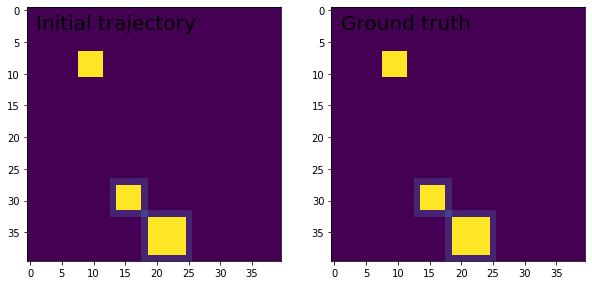

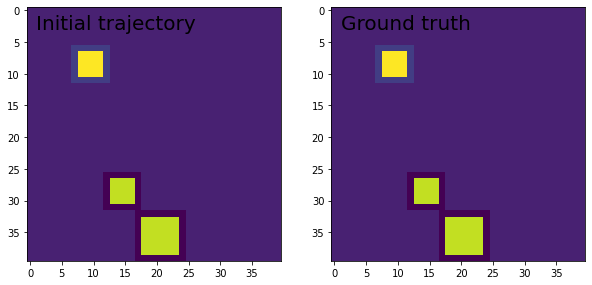

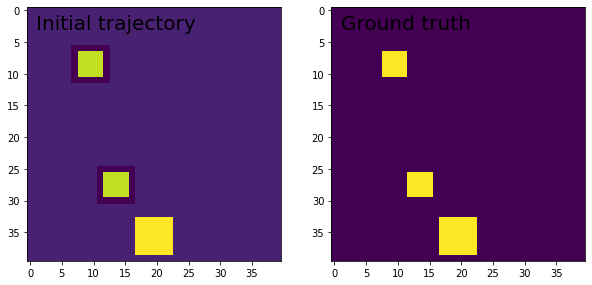

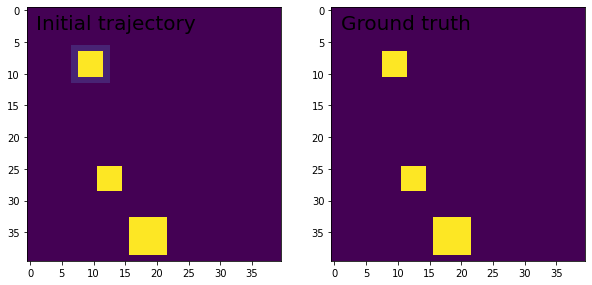

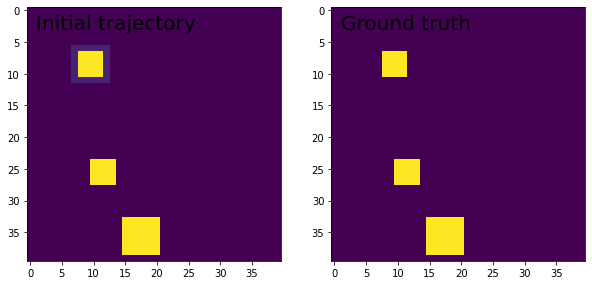

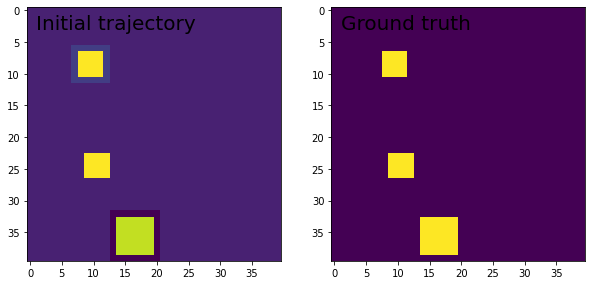

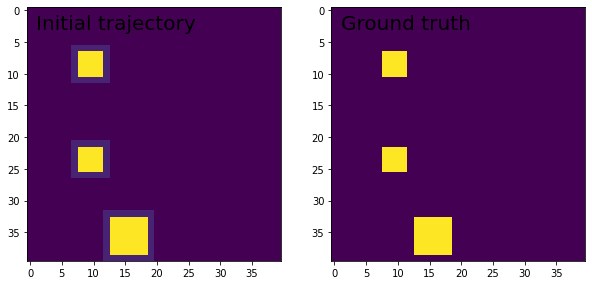

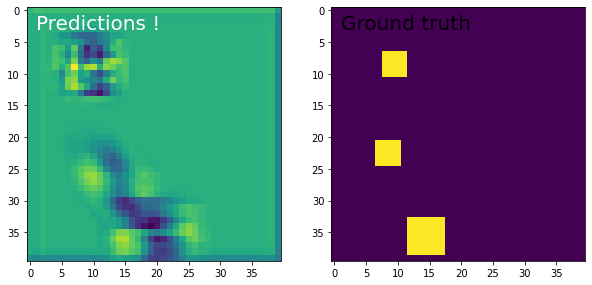

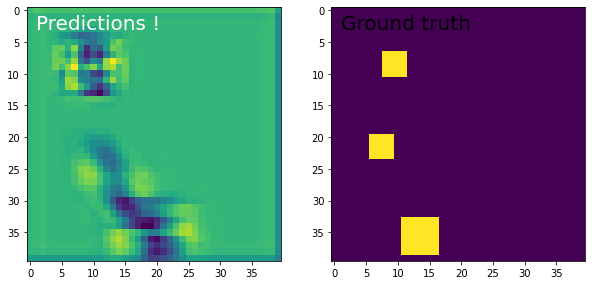

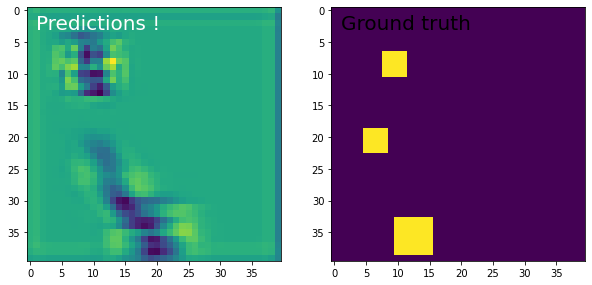

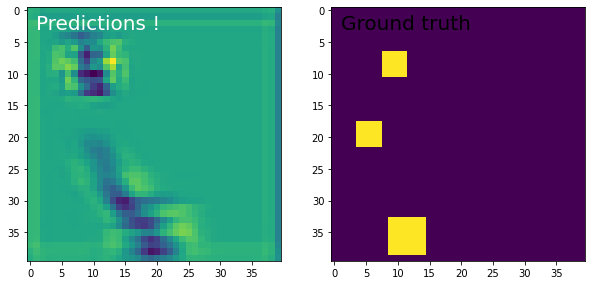

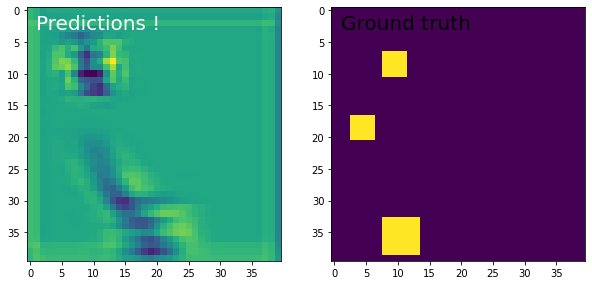

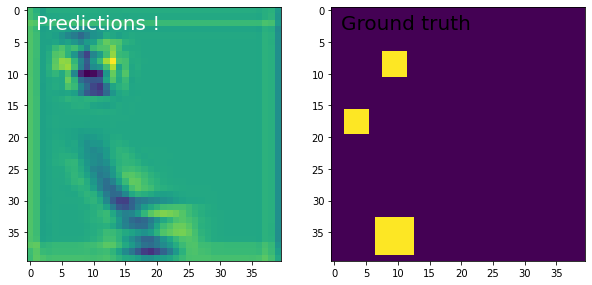

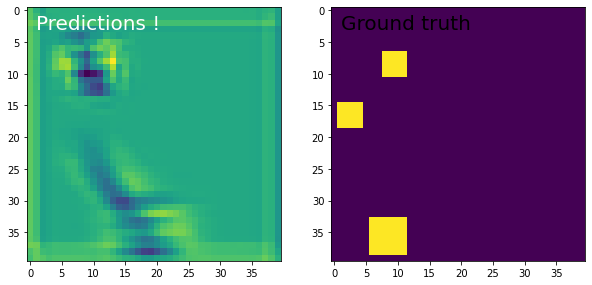

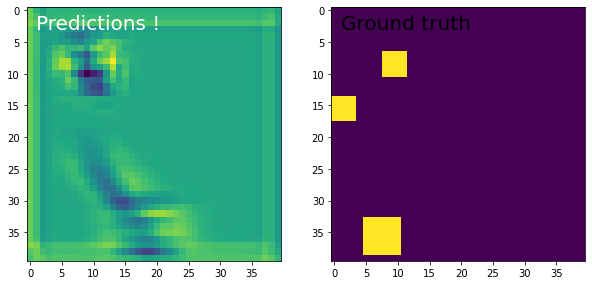

In [67]:
""" This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
#from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(tf.keras.layers.BatchNormalization())

#seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   #padding='same', return_sequences=True))
#seq.add(tf.keras.layers.BatchNormalization())

#seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   #padding='same', return_sequences=True))
#seq.add(tf.keras.layers.BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(tf.keras.layers.BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

【問題2】（アドバンス課題）複数のデータセット間での比較  
この問題は保留

【問題3】他のクラスの説明

●RNN  
時系列データ（動画やテキストといった、列全体として意味を持つようなデータ）を入力にとり、今の時刻の入力に加えて前の時刻の「状態」も使って出力を決めるニューラルネットワーク。並びに大きな意味のあるデータを取り扱うことができるクラスの基本的なものである。  
「出力が、今の時刻の入力と、前の時刻の「状態」に依存する

●SimpleRNNCell  
出力が入力にフィードバックされる全結合RNN

●GRUCell  
前出のRNN (Recurrent Neural Network) は、1ステップ前の出力を自身の入力として与えることで、過去の情報を利用できる。ただし、RNNでは長期間のデータを扱えない。それを可能にしたのがGRU (Gated Recurrent Unit) （あるいはLSTM (Long Short Term Memory) ）が使われる

●LSTMCell  
LSTMは、ディープラーニングの分野において用いられる人工回帰型ニューラルネットワーク（RNN）アーキテクチャである。標準的な順伝播型ニューラルネットワーク（英語版）とは異なり、LSTMは自身を「汎用計算機」にするフィードバック結合を有する。LSTMは画像といった単一のデータ点だけでなく、音声あるいは動画といった全データ配列を処理できる。

●StackedRNNCells  
Recurrent Neural Network (RNN) はデータ内の時間的な
依存関係を、層内ユニット間の有向の結合によって学習する
ニューラルネットワークである。

●CuDNNGRU  
CuDNNを利用した高速なGRU実装

●CuDNNLSTM  
CuDNNを利用した高速なLSTM実装